# Basics of visualization
One picture (or graph) can sometimes say more than a thousand words. This is even more the case for exploratory data analysis.

In this lesson, we'll show you how to plot some basic types of graphs: bar plot, line plot, and scatter plot.

## The diverse world of visualization libraries in Python
While there is a consensus on a library for common tabular data processing, and we usually look for `pandas` when examining small to medium-sized data of a non-exotic type, there are plenty of libraries for data visualization. Each has its advantages and disadvantages. We will introduce the following three in the course and we will focus mainly on how to use them together with pandas:
- `matplotlib` - This is probably the most widespread and in many ways the most flexible library. It is the default option if you need good-looking static graphs that will work almost anywhere. Considerable flexibility is balanced by sometimes not entirely intuitive names of functions and arguments. Pandas uses it internally (that&#39;s why you don&#39;t have to get acquainted with it in such detail). See https://matplotlib.org/.
- `seaborn` - The aim of this library is to help with statistical graphs in particular. It builds on matplotlib. We will work with it to visualize more complex relationships between multiple variables. See https://seaborn.pydata.org/.
- `plotly` (especially its subset `plotly.express`) - You will reach for this library if you want to add interactivity to your visualization. Especially when working in a Jupyter laptop, it allows you to explore everything much faster. See https://plot.ly/python/.
💡 For a more detailed explanation, we recommend watching the video by Jake Vanderplase: Python Visualizations Landscape (https://www.youtube.com/watch?v=FytuB8nFHPQ), which summarizes the basic features of each library.

## Matplotlib

In [8]:
import matplotlib
import matplotlib.pyplot as plt #plt is a convention alias, like pd for pandas
import numpy as np

Key things to remember about data visualisation in matplotlib:

* Matplotlib graphs your data on `Figures` (e.g. Jupyter Lab widgets)
* Each `Figure` can contain one or more `Axes`, an area where points can be specified in terms of x-y coordinates`

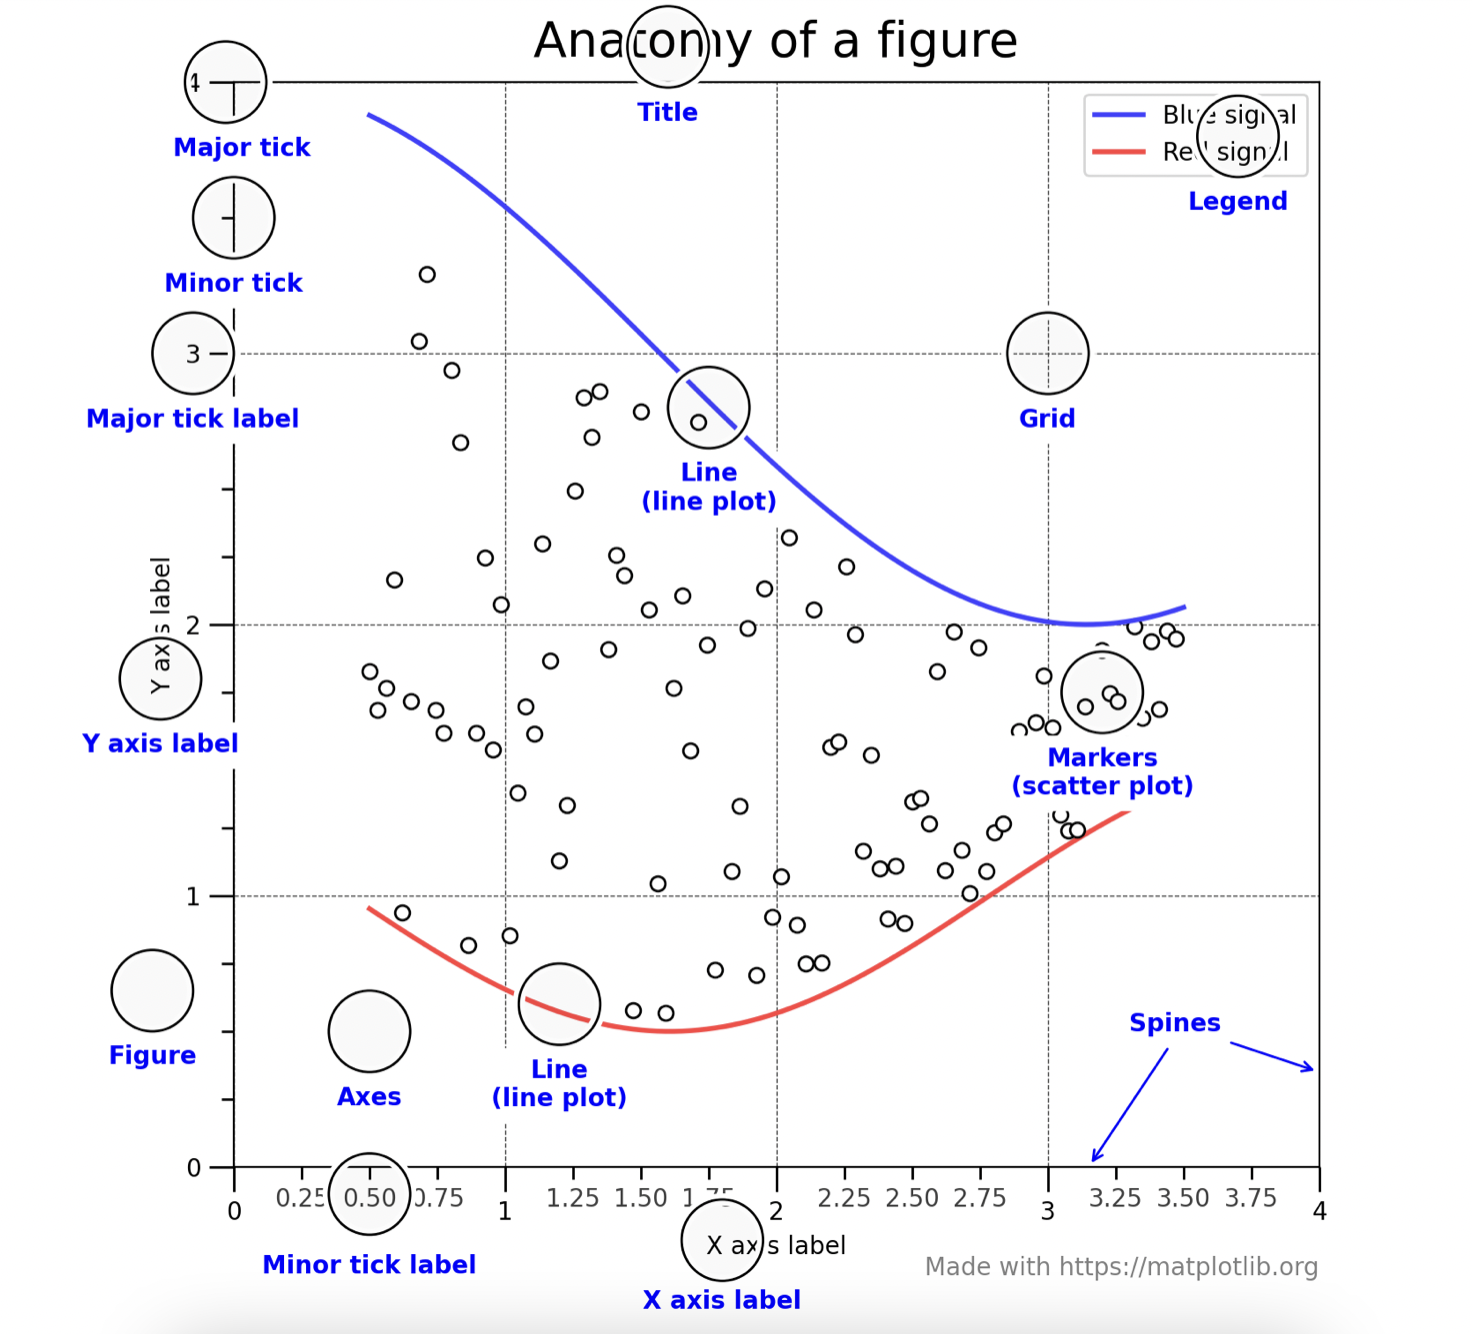

### Three ways of plotting with Matplotlib

As noted above, there are essentially **three ways** to use Matplotlib:

1. Explicitly create `Figures` and `Axes`, and call methods on them (the "object-oriented (OO) style").
2. Rely on`pyplot` to automatically create and manage the`Figures` and `Axes`, and use `pyplot` functions for plotting.
3. Use `pandas` objects that come equipped with their plotting functions. These plotting functions are wrappers around the `matplotlib` library.

### Object-oriented plotting

Let us have one example of object-oriented way of plotting with matplotlib for the sake of understanding what happens under the hood. Throughout this leeson we will stick to simplified approach with `pandas` library.

The simplest way of creating a`Figure` with an `Axes` is using pyplot.subplots. We can then use Axes.plot to draw some data on the Axes`

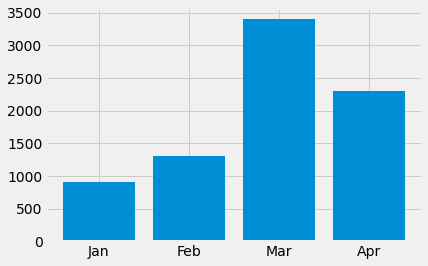

In [9]:
#Simple barplot

months = ["Jan","Feb","Mar","Apr"] #list with months' names
money_spent = [900, 1300, 3400, 2300] #list with monthly spending in EUR

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.bar(months, money_spent);

In [10]:
#Let's use a more appealing styling inspired by Nate Silver (best-selling author known for his unique brand of creativity, journalism and statistical analysis)
plt.style.use("fivethirtyeight")

> 💡 Nate Silver's FiveThirtyEight online platform uses statistical analysis — hard numbers — to tell compelling stories about elections, politics, sports, science. You can recreate some of his graphs using his github repo: https://github.com/fivethirtyeight/data

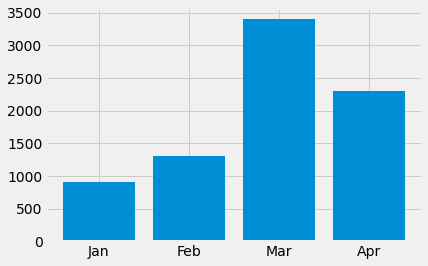

In [11]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.bar(months, money_spent);

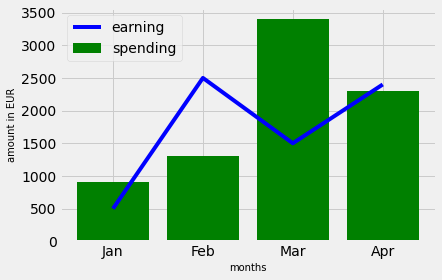

In [12]:
#Add a linechart with earnings and adjust the colours

money_earned = [500,2500,1500, 2400]

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.bar(months, money_spent, color ="green" , label = "spending")
ax.plot(months, money_earned, color ="blue" , label = "earning")
ax.set_xlabel("months", fontsize=10)
ax.set_ylabel("amount in EUR", fontsize=10)
ax.legend();


## Plotting with Pandas

In `pandas`, the functions for drawing graphs are accessed using the so-called `accessor` .plot. This is a hybrid object that can be called as a method (`Series.plot()` - uses the default chart type), or you can use another dot to reference its own methods that draw different chart types. (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas).

## Preparation - load data
First, we read the countries dataset that we have already used in the pandas data types lesson.

In [14]:
import pandas as pd

countries = pd.read_csv("countries.csv").set_index("name")
countries.head()

iso             world_6region world_4region        income_groups  \
name                                                                            
Afghanistan  AFG                south_asia          asia           low_income   
Albania      ALB       europe_central_asia        europe  upper_middle_income   
Algeria      DZA  middle_east_north_africa        africa  upper_middle_income   
Andorra      AND       europe_central_asia        europe          high_income   
Angola       AGO        sub_saharan_africa        africa  upper_middle_income   

             is_eu  is_oecd eu_accession  year       area  population  \
name                                                                    
Afghanistan  False    False          NaN  2018   652860.0  34500000.0   
Albania      False    False          NaN  2018    28750.0   3238000.0   
Algeria      False    False          NaN  2018  2381740.0  36980000.0   
Andorra      False    False          NaN  2017      470.0     88910.0   
Angola       False    False          NaN  2018  1246700.0  20710000.0   

             alcohol_adults  bmi_men  bmi_women  car_deaths_per_100000_people  \
name                                                                            
Afghanistan            0.03    20.62      21.07                           NaN   
Albania                7.29    26.45      25.66                         5.978   
Algeria                0.69    24.60      26.37                           NaN   
Andorra               10.17    27.63      26.43                           NaN   
Angola                 5.57    22.25      23.48                           NaN   

             calories_per_day  infant_mortality  life_expectancy  \
name                                                               
Afghanistan            2090.0              66.3            58.69   
Albania                3193.0              12.5            78.01   
Algeria                3296.0              21.9            77.86   
Andorra                   NaN               2.1            82.55   
Angola                 2473.0              96.0            65.19   

             life_expectancy_female  life_expectancy_male un_accession  
name                                                                    
Afghanistan                  65.812                63.101   1946-11-19  
Albania                      80.737                76.693   1955-12-14  
Algeria                      77.784                75.279   1962-10-08  
Andorra                         NaN                   NaN   1993-07-28  
Angola                       64.939                59.213   1976-12-01

## Bar plot
The simplest chart you can create is **bar plot**. You will gradually display columns next to each other according to the property that interests you. Bar plot shows the values of one variable without statistically processing or comparing them in any way with another variable.


In [15]:
countries.head()

iso             world_6region world_4region        income_groups  \
name                                                                            
Afghanistan  AFG                south_asia          asia           low_income   
Albania      ALB       europe_central_asia        europe  upper_middle_income   
Algeria      DZA  middle_east_north_africa        africa  upper_middle_income   
Andorra      AND       europe_central_asia        europe          high_income   
Angola       AGO        sub_saharan_africa        africa  upper_middle_income   

             is_eu  is_oecd eu_accession  year       area  population  \
name                                                                    
Afghanistan  False    False          NaN  2018   652860.0  34500000.0   
Albania      False    False          NaN  2018    28750.0   3238000.0   
Algeria      False    False          NaN  2018  2381740.0  36980000.0   
Andorra      False    False          NaN  2017      470.0     88910.0   
Angola       False    False          NaN  2018  1246700.0  20710000.0   

             alcohol_adults  bmi_men  bmi_women  car_deaths_per_100000_people  \
name                                                                            
Afghanistan            0.03    20.62      21.07                           NaN   
Albania                7.29    26.45      25.66                         5.978   
Algeria                0.69    24.60      26.37                           NaN   
Andorra               10.17    27.63      26.43                           NaN   
Angola                 5.57    22.25      23.48                           NaN   

             calories_per_day  infant_mortality  life_expectancy  \
name                                                               
Afghanistan            2090.0              66.3            58.69   
Albania                3193.0              12.5            78.01   
Algeria                3296.0              21.9            77.86   
Andorra                   NaN               2.1            82.55   
Angola                 2473.0              96.0            65.19   

             life_expectancy_female  life_expectancy_male un_accession  
name                                                                    
Afghanistan                  65.812                63.101   1946-11-19  
Albania                      80.737                76.693   1955-12-14  
Algeria                      77.784                75.279   1962-10-08  
Andorra                         NaN                   NaN   1993-07-28  
Angola                       64.939                59.213   1976-12-01

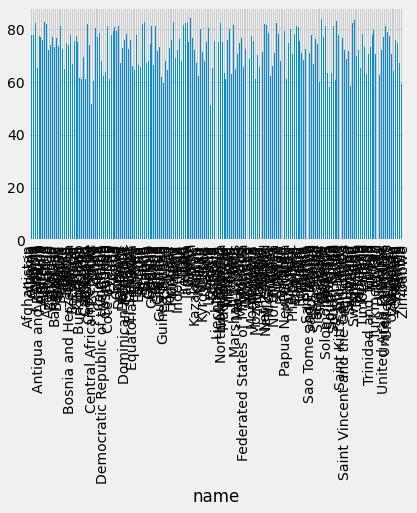

In [16]:
countries["life_expectancy"].plot.bar();

Uh, that doesn't look very clear. Let's try the same, only for the countries of the European Union. Filtering in `query` expects logical values and `"is_eu"` is a series of logical values.

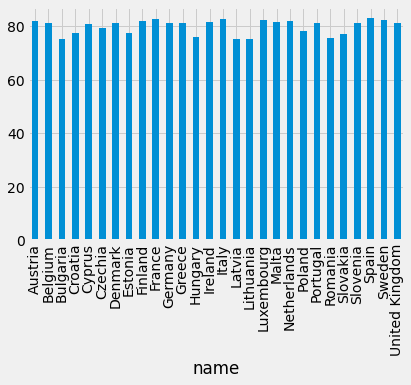

In [18]:
eu_countries = countries.query("is_eu") # create a new df with European countries

eu_countries["life_expectancy"].plot.bar(); #create a barplot

Do people live longer in the UK or Germany? This is not easy to compare. What if we sorted the values and then displayed them?

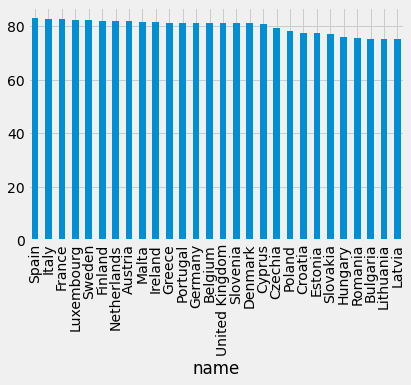

In [19]:
eu_countries["life_expectancy"].sort_values(ascending=False).plot.bar();

Country names do not read very comfortably. How about turning it around? We can try a horizontal bar graph, `.plot.barh`:

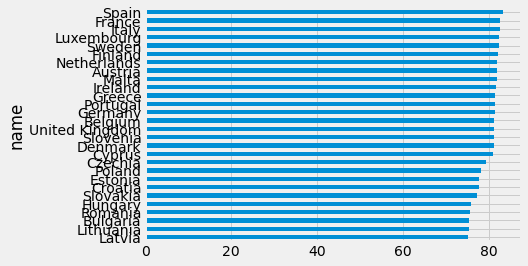

In [20]:
eu_countries["life_expectancy"].sort_values().plot.barh();

Graphing functions offer a lot of parameters that are not well documented and are quite closely related to how the `matplotlib` library works. We will show them gradually when they come in handy. We would like to enlarge our chart a bit in height. Also, the values do not differ much from each other, and setting a custom range on the x-axis would help highlight the differences. Plus we add a little formatting.
* `figsize` specifies the size of the graph as a tuple of size in inches (width, height). To experiment with the ideal value, simply experiment on your laptop.
* `xlim` specifies the range of values on the x-axis in a similar pair (minimum, maximum)
* `color` specifies the fill color: it can be a name or a hexadecimal RGB notation
* `edgecolor` says the color of the columns
* `title` sets the title of the whole graph

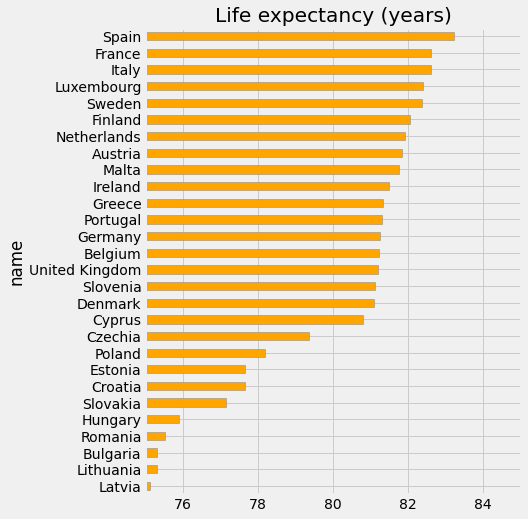

In [21]:
eu_countries["life_expectancy"].sort_values().plot.barh(
    figsize=(6, 8),
    xlim = (75, 85), 
    color="orange", 
    edgecolor = "#888888", # medium gray
    title = "Life expectancy (years)"); 

💡 Starting at a value other than zero will help you notice even slight differences. This is definitely a good idea in the exploratory phase. 

However, when presenting the results, the highlighted differences can confuse the audience and give the impression that an effect is significantly stronger than it actually is. The less intuitive the presented data, the stronger the manipulation effect. 

In this case, probably few would believe that people live in Spain sixty times longer than in Latvia, because it does not meet normal expectations, but even so, at first glance the situation looks very dramatic (we leave you to judge whether the difference between 75 and 83, or about 10% is huge or not). This is how journalists confuse quite often - either intentionally or by mistake.

We can easily display multiple quantities in the graph at once, if we do not create it through `Series`, but `DataFrame`. All you have to do is supply more columns instead of one column and we will see more columns below each row.
In our case, we will look at how many years men and women live.

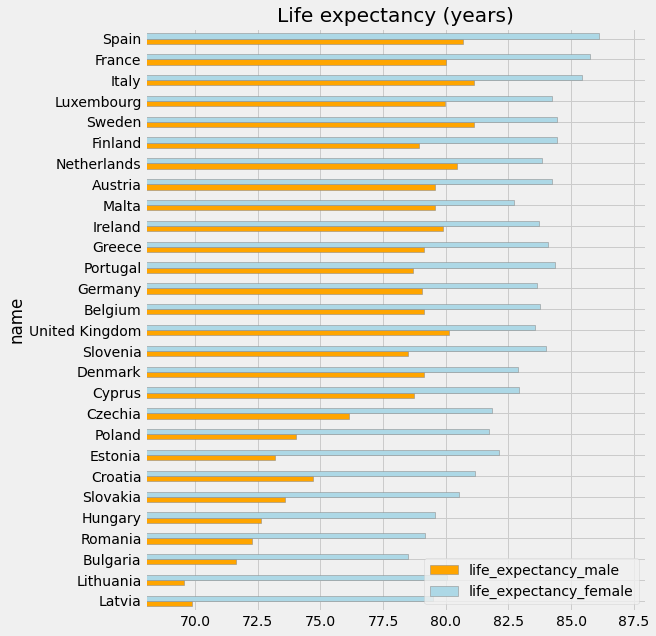

In [22]:
eu_countries.sort_values("life_expectancy")[["life_expectancy_male", "life_expectancy_female"]].plot.barh(
                            figsize=(8, 10),
                            xlim = (68, 88),
                            color = ["orange", "lightblue"],
                            edgecolor = '#888888',
                            title = "Life expectancy (years)");

> ### Task 
Draw a graph comparing infant mortality in each country in the America region. Name the graph &quot;Newborn mortality per 1000&quot; and rank the country from highest mortality to lowest. Which country has the highest mortality and which the lowest?

In [24]:
eu_countries.columns

Index(['iso', 'world_6region', 'world_4region', 'income_groups', 'is_eu',
       'is_oecd', 'eu_accession', 'year', 'area', 'population',
       'alcohol_adults', 'bmi_men', 'bmi_women',
       'car_deaths_per_100000_people', 'calories_per_day', 'infant_mortality',
       'life_expectancy', 'life_expectancy_female', 'life_expectancy_male',
       'un_accession'],
      dtype='object')

In [26]:
countries["world_4region"].unique()

array(['asia', 'europe', 'africa', 'americas'], dtype=object)

In [29]:
america_countries = countries.query("world_4region == 'americas'") 

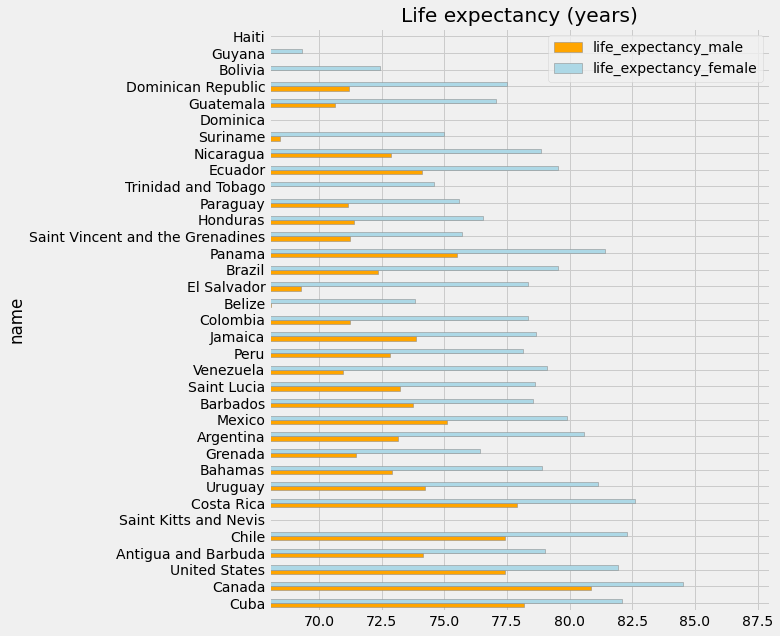

In [30]:
america_countries.sort_values("infant_mortality")[["life_expectancy_male", "life_expectancy_female"]].plot.barh(
                            figsize=(8, 10),
                            xlim = (68, 88),
                            color = ["orange", "lightblue"],
                            edgecolor = '#888888',
                            title = "Life expectancy (years)");

> ### HOMEWORK Task 
Create a horizontal bar graph showing the BMI (body mass index) of men and the BMI of women in the countries with the lowest income (`low_income`).
* As South Sudan does not report BMI, omit this country.
* Sort countries by men&#39;s BMI from highest to lowest.
* Name the chart &quot;Gender difference between men and women in the lowest income countries&quot;.
* Choose the size of the graph `(12,12)` or another value that you find clear.
* Display BMI values (range of values on the x-axis) from 18 to 26.
* Fill the column of men with blue, the column of women with pink.
* Columns bordered in gray.

In [14]:
# Your code goes here...

> ### HOMEWORK Task 
Try to draw a bar graph of some of the other characteristics of countries (whether European or by filtering through a region) - try to derive meaningful comparisons.

In [15]:
# Your code goes here...

## Scatter plot
A scatter plot is the easiest way to compare two different attributes in a dataset. **Each observation** (one row in a dataset) corresponds to **one point**. The values of the two columns then encode the coordinates `x` and `y`. 

In `pandas` we call the method `plot.scatter` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html) of our table and supply it with arguments `x` and `y` - column names used for coordinates:

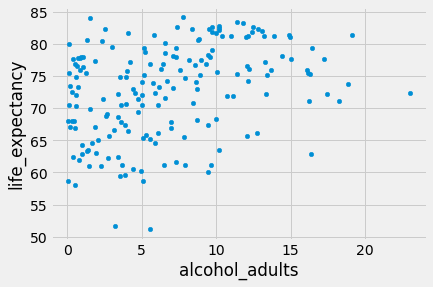

In [16]:
# Relationship between drinking and life expectancy
countries.plot.scatter(x="alcohol_adults",
                       y="life_expectancy");

💡 We will talk about causality & correlations between variables another time, but you also can't help the impression that the more you drink somewhere, the longer you live there?

Let's pimp up our chart and get more meaningful results by adding more arguments:
* `s` expresses the size (or approximately the area) of the symbol in points (it can be one value or a column / field of values)
* `marker` indicates the shape of the symbol, usually in one letter, see (Check more: https://matplotlib.org/3.1.1/api/markers_api.html)
* `alpha` expresses the opacity of the symbol (0 = completely transparent and not visible, 1 = fully opaque). It is useful when we have a large number of symbols in the chart and we want to allow them to overlap.

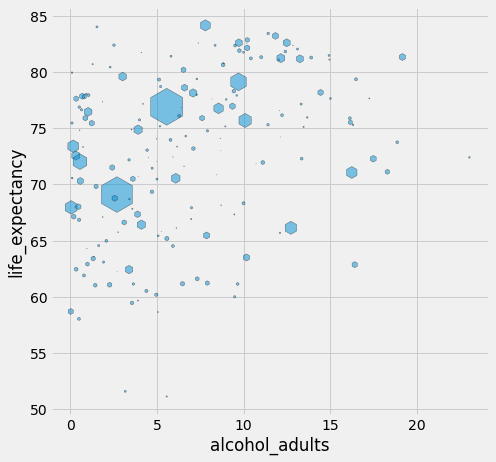

In [17]:
# Relationship between drinking and life expectancy
countries.plot.scatter(figsize=(7, 7),
                       x="alcohol_adults",
                       y="life_expectancy",
                       marker ="h",
                       s = countries["population"] / 1e6,
                       edgecolor = 'black',
                       alpha = 0.5);

Breaking down our dataset into categories might provide additional insights. Let's map a distinctive colour for each continent in our data set and create a new `Series` with colours for each observation.(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)

We apply a handy method `map`(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) that maps values of `Series` according to an input mapping or function. The `world_4region` column contains exactly 4 different values ("continents"), so a very simple dictionary will suffice.

In [18]:
region_colors = {"europe": "blue",
                "asia": "yellow",
                "africa": "black",
                "americas": "red"}

color = countries["world_4region"].map(region_colors)

In [19]:
color

name
Afghanistan    yellow
Albania          blue
Algeria         black
Andorra          blue
Angola          black
                ...  
Venezuela         red
Vietnam        yellow
Yemen          yellow
Zambia          black
Zimbabwe        black
Name: world_4region, Length: 193, dtype: object

Now that we use `color` in the `color` argument, a specific value is applied to each point.

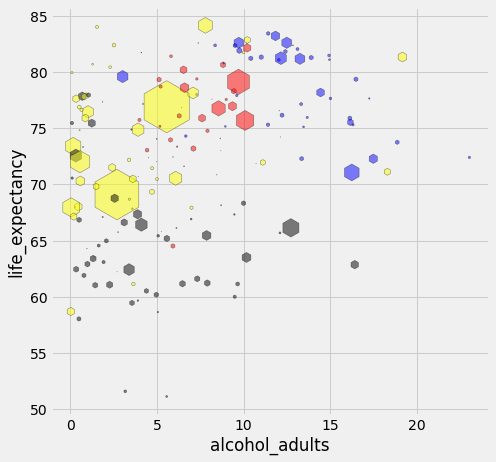

In [20]:
countries.plot.scatter(figsize=(7, 7),
                        x="alcohol_adults",
                        y="life_expectancy",
                        marker = "h",
                        color = color,
                        s = countries["population"] / 1e6*2,
                        edgecolor = 'black',
                        alpha = 0.5);

Now its possible to derive some more substantial findings:
* Majority of the world's population live in countries with an average of less than 10 litres pure alcohol per capita per year
* In Africa people tend to live shorter compared to other continents
* Some African countries have higher life-expectancy than some European countries
* In Europe people tend to live long and drink lots of alcohol
* It seems that within Europe, more drinking means a shorter life.

Are you curious how your country of origin compares to other countries? Let's again play around with `map` function and colour your country of origin in red:

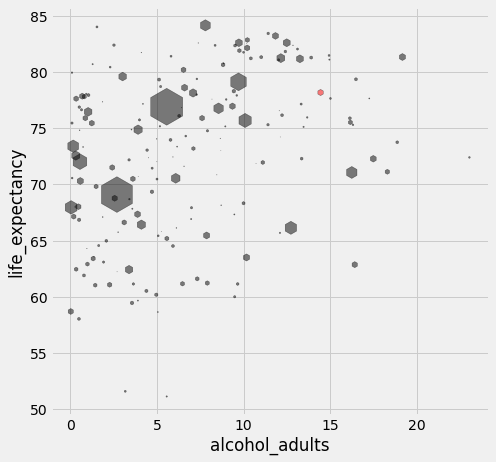

In [21]:
countries.plot.scatter(
                        figsize=(7, 7),
                        x="alcohol_adults",
                        y="life_expectancy",
                        marker = "h",
                        s = countries["population"] / 1e6,
                        edgecolor = 'black',
                        alpha = 0.5,
                        c = countries.index.map(lambda x: 'red' if x == 'Poland' else 'black'));

## Scatter plot - logarithmic scale

It often happens that the values are difficult to compare. For example, in terms of area or population, there are miniature and gigantic countries in the world. The differences are difficult to derive from the standard scatter plot:

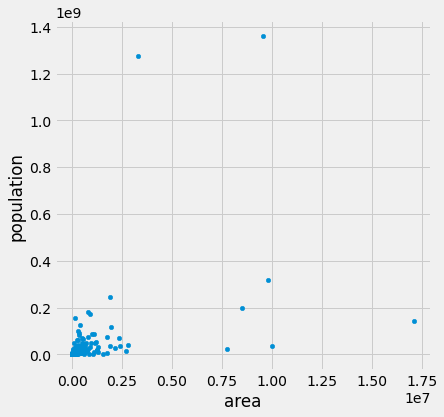

In [22]:
countries.plot.scatter( x="area",
                        y="population",
                        figsize=(6,6));

We see about 7 to 20 points separately and the rest merges into one big "bucket". In this case, it is advisable to leave behind the normal **linear scale** . We will use **logarithmic scale** instead. The arguments `logx` and` logy` (according to the respective axis) are used:

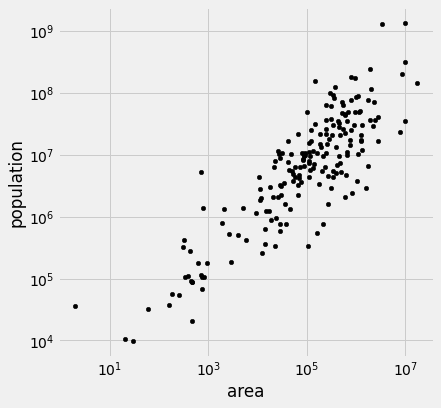

In [23]:
countries.plot.scatter(
                            x="area",
                            y="population",   
                            color="black",
                            figsize=(6, 6),
                            logx=True,
                            logy=True);

💡 Please watch this video if you forgot the concept behind logarithmic scale: https://www.youtube.com/watch?v=sBhEi4L91Sg

> ### Task
Create a scatter plot and compare men&#39;s BMI with the number of calories received per day.
* Come up with a suitable chart name.
* Choose the size of the graph `(8,8)` or another value that you find clear.
* Set the shape of the marker to a star.
* Marker color green.
* Marker size 30.

In [24]:
# Your code goes here...

> ### HOMEWORK Task
Use a scatter plot to compare life expectancy (x-axis) and infant mortality (y-axis).
- Give a chart a title of your choice.
- Choose the graph size `(7,7)` or another value of your choice.
- Set the symbol on a yellow square with red borders, the size of the square according to the population of the country (`population / 1_000_000`).
- Select `0.5` symbol transparency.
- Display infant mortality on the logarithmic axis.

What is the relationship between life expectancy and infant mortality?

In [25]:
# Your code goes here...

> ### HOMEWORK Task
Try to display some other pairs of quantities. Which of them provide interesting insights?

In [26]:
# Your code goes here...

## Line plot
This type of graph makes sense especially if one variable evolves continuously depending on another variable. Time series are a great example (whether for the relationship between time and a variable, or two variables that both evolve through the same time frame.
You create a line graph using the `plot.line` method (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html). 

Coincidentally, this is also the default graph type for `pandas`, so it is enough to call `plot` as a method. It has parameters similar to `scatter`.

Let's look at the development of life expectancy in Poland, as it has developed over time since the early 1900s:

In [27]:
#Load a small dataset
poland = pd.read_csv("poland.csv")
poland.head()

year  life_expectancy
0  1799             35.9
1  1800             35.9
2  1801             35.9
3  1802             35.9
4  1803             35.9

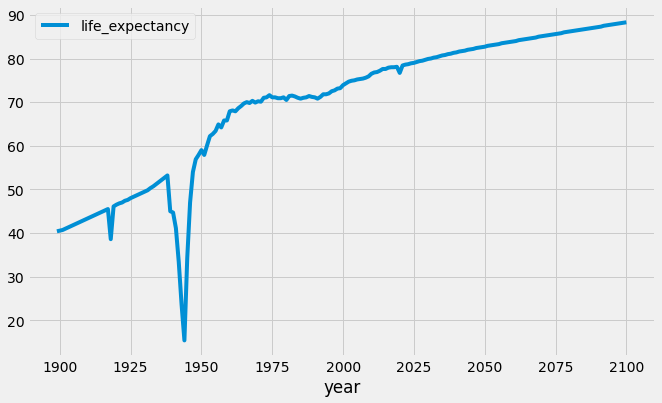

In [28]:
poland.iloc[100:].plot(x="year", y="life_expectancy", figsize = (10,6));

There are several interesting arguments for line plots:
* `lw` indicates the line thickness in points
* `style` is a line style `-` solid line, `:` dotted line, `--` dashed line
* `marker`- shape of marker (https://matplotlib.org/stable/api/markers_api.html)
* `markersize` is the size of the marker that can optionally accompany the line


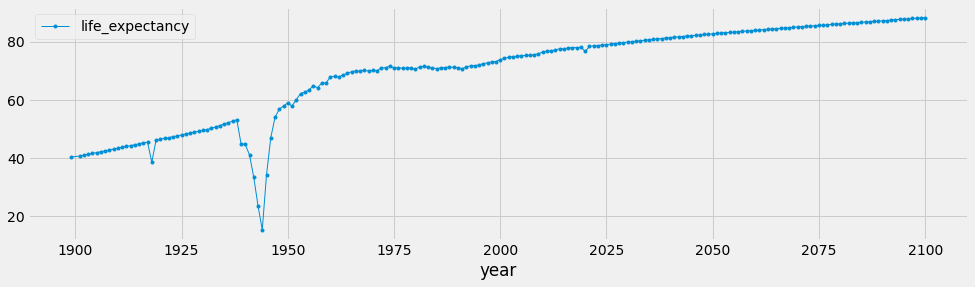

In [29]:
poland.iloc[100:].plot.line(
                x="year",
                y = "life_expectancy",
                figsize = (15,4),
                lw=1,   
                style="-",
                marker = "o", # Add round points for values from the table
                markersize = 3);

> ### Task HOMEWORK
Explore arguments of bar, scatter and lineplot. Create charts using arguments not mentioned in this lesson. Refer to documentation of pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot and matplotlib: https://matplotlib.org/stable/index.html

In [30]:
# Your code goes here...

## Saving plots
So far, all the charts have been plotted within the Jupyter Lab.

We can save our figures by first getting an object of type `Axis` as a result of the drawing functions, with its help we get an object of type `Figure` (it includes the whole graphics area, not "only" one graph and axes), and it offers a method `savefig` (https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.savefig):

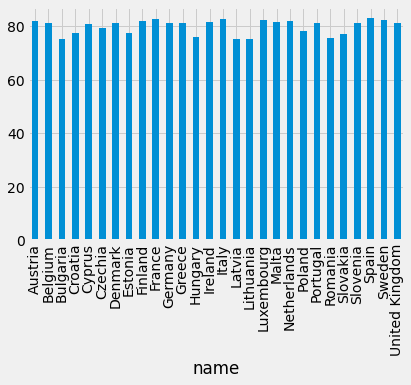

In [31]:
axes = eu_countries["life_expectancy"].plot.bar()
figure = axes.get_figure()
figure.savefig("expectancy.png", dpi=100)


## Bonus: How to draw using other libraries?
And that&#39;s basically everything from the basics of visualization, we&#39;ll show other types of graphs another time.
If that&#39;s not enough for you, we&#39;ll show you how to create a scatter plot of the relationship between life expectancy and the amount of pure alcohol consumed in three different visualization libraries. However, we will not comment on it too much.

### Bonus 1: &quot;pure&quot; matplotlib
Because the default graphing in `pandas` builds on the` matplotlib` library and only the individual functions wrap and make it easier to work with columns, the function parameters will usually be similar (the main difference is that they do not take column names, you have to pass the column as such).

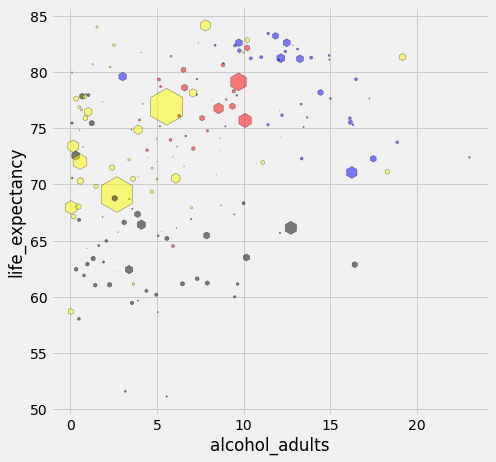

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(
    countries["alcohol_adults"],
    countries["life_expectancy"],
    s=countries["population"] / 1e6,
    color=countries["world_4region"].map({"europe": "blue", "asia": "yellow", "africa": "black", "americas": "red"}),
    edgecolor="black",
    marker = "h",
    alpha=0.5)

# Axis labels must be filled in manually
ax.set_xlabel("alcohol_adults")
ax.set_ylabel("life_expectancy");

The gallery of sample examples of `matplotlib` is inexhaustible: https://matplotlib.org/3.3.1/gallery/index.html

### Bonus 2: seaborn

Seaborn is especially suitable for more complex statistical graphs. But it also contains its own functions that wrap around the `matplotlib` call.

In [ ]:
import seaborn as sns

sns.scatterplot(
                data=countries,
                x="alcohol_adults",
                y = "life_expectancy", 
                size = countries["population"].tolist(),
                edgecolor = 'black',
                hue = countries["world_4region"].tolist());

Many sample visualizations can be found on the project itself: https://seaborn.pydata.org/examples/index.html

### Bonus 3: plotly.(express)

`plotly` is much more advanced since it allows you to display interactive graphs directly in the notebook, in which you can zoom freely, in addition, when approaching a point, they show useful tooltips. Since version 4.0 it uses very elegantly designed functions in the integrated package `plotly.express`.

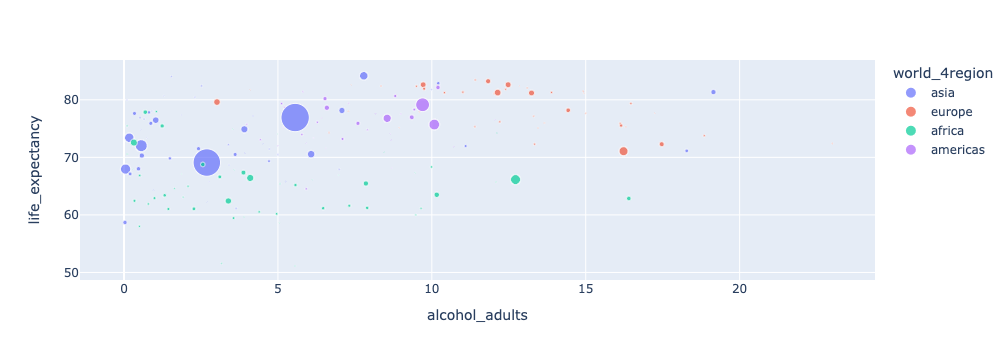

In [72]:
import plotly.express as px

px.scatter(
            countries.reset_index (), # We return the index back to the table (as "name")   
            x="alcohol_adults",
            y="life_expectancy",
            size="population",
            color="world_4region",
            hover_name = "name") # Used when hovering the mouse as the title of the auxiliary balloon)

And what would you say on a world map with countries colored according to life expectancy?

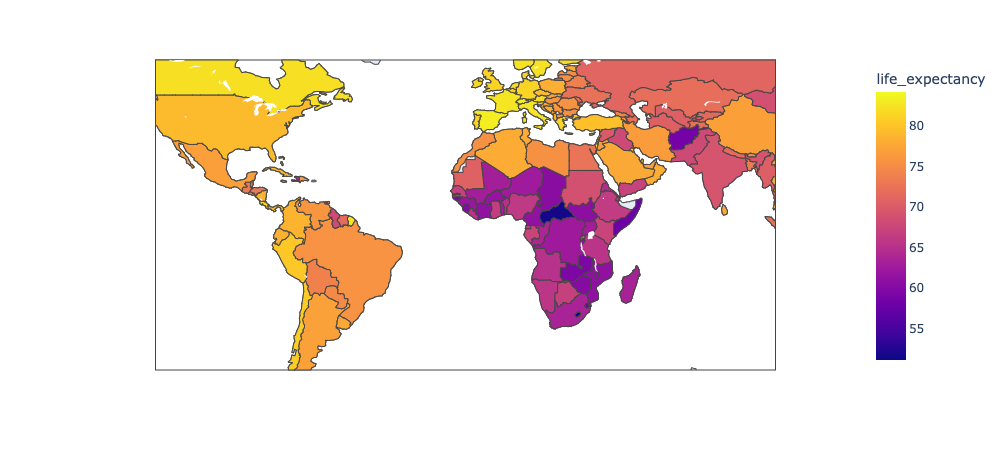

In [73]:
px.choropleth(
    countries.reset_index(),  
    locations="iso",
    color="life_expectancy",  
    hover_name="name"
)

Many examples, including several with countries around the world, can be found on the project website: https://plot.ly/python/plotly-express/